In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data1.txt',header=None,names=('population','profit'))

In [3]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


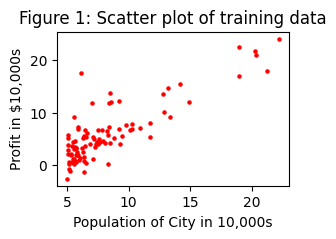

In [5]:
data.plot(kind='scatter', x='population', y='profit', color='red',marker='.',figsize=(3,2))
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.title('Figure 1: Scatter plot of training data')
plt.show()

In [6]:
def computeCost(x,y,theta):
    inner = np.power(x*theta-y,2)
    return sum(inner)/(2*len(x))

In [7]:
data.insert(0, 'Ones', 1)

In [8]:
data

,Ones,population,profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [9]:
Xdata = data.iloc[:, :2]
Ydata = data.iloc[:, 2:3]

In [10]:
Xdata.head()

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [11]:
Ydata.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [12]:
X = np.matrix(Xdata)
Y = np.matrix(Ydata)
theta = np.matrix([[0],[0]])

In [13]:
X.shape,Y.shape,theta.shape

((97, 2), (97, 1), (2, 1))

In [14]:
computeCost(X,Y,theta)

matrix([[32.07273388]])

In [15]:
def gradientDecent(x,y,theta,alpha,iters):
    m = len(x)
    costHistory = np.zeros(iters)
    thetaHistory = np.zeros((iters,*theta.shape))
    print(f'Current theta value is: theta0:{theta[0,0]}  theta1:{theta[1,0]}')
    for i in range(iters):
        print(f'{i+1}th iters:')
        predic = x * theta
        erros = predic - y
        theta = theta - alpha/m*x.T*erros
        thetaHistory[i] = theta
        costHistory[i] = computeCost(x,y,theta) 
        print(f'theta update to: theta0:theta0:{theta[0,0]}  theta1:{theta[1,0]}. cost:{costHistory[i]}')
        print('-'*16)
    return thetaHistory,costHistory,costHistory[i]

In [16]:
alpha = 0.01
iters = 1000

In [ ]:
thetaHistory,costHistory,costlast = gradientDecent(X,Y,theta,alpha,iters)

Text(0.5, 1.0, 'trainData vs predict')

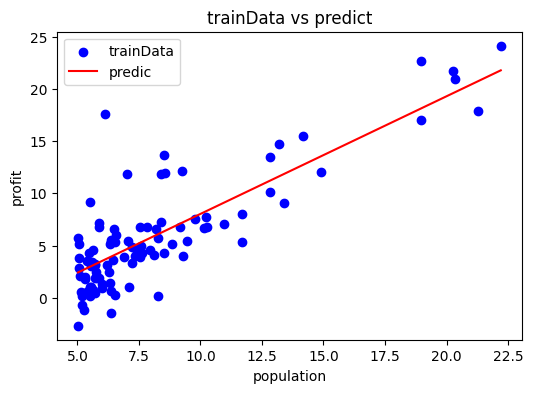

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(data.population,data.profit,label='trainData',color='b')
xax = np.linspace(data.population.min(), data.population.max(), 100)
yax = thetaHistory[-1,0,0]+thetaHistory[-1,1,0] * xax
plt.plot(xax,yax,label='predic',color='r')
plt.legend(loc=2)
plt.xlabel('population')
plt.ylabel('profit')
plt.title('trainData vs predict')

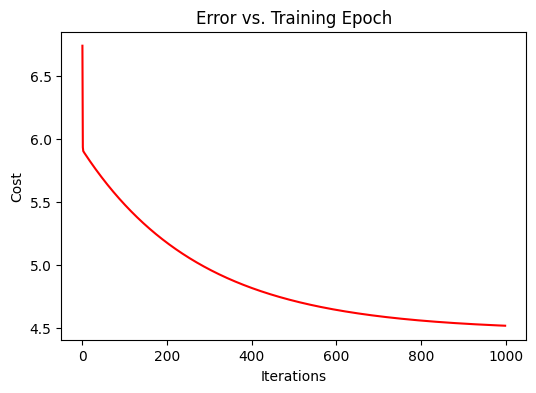

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(np.arange(iters), costHistory, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 画出3D图

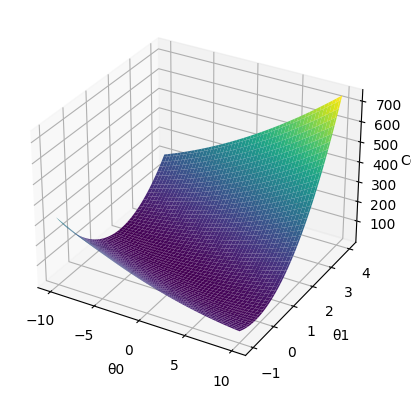

In [20]:
from mpl_toolkits.mplot3d import Axes3D

# 生成示例数据
x_values = np.linspace(-10, 10, 100)
y_vlues = np.linspace(-1, 4, 100)
theta0, theta1 = np.meshgrid(x_values, y_vlues)
cost = np.zeros_like(theta0)

# 计算代价函数值
for i in range(len(theta0)):
    for j in range(len(theta1)):
        cost[i, j] = computeCost(X, Y, np.matrix([theta0[i, j], theta1[i, j]]).T)

# 创建一个新的3D图形对象
fig = plt.figure()

# 添加一个3D子图
ax = fig.add_subplot(111, projection='3d')

# 绘制3D曲面图
ax.plot_surface(theta0, theta1, cost, cmap='viridis')

# 设置轴标签
ax.set_xlabel('θ0')
ax.set_ylabel('θ1')
ax.set_zlabel('Cost')

# 显示图形
plt.show()

Text(0.5, 1.0, 'Contour Plot of Function Z = X^2 + Y^2')

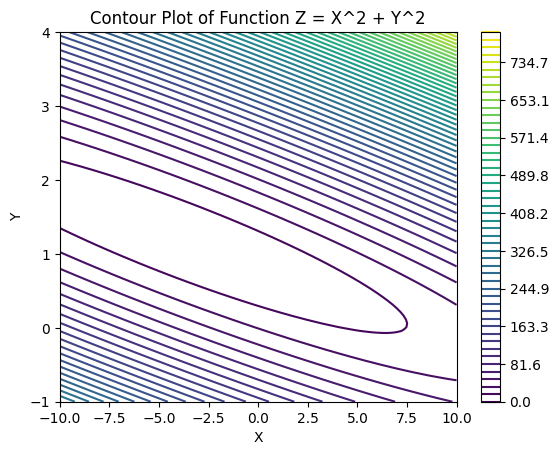

In [21]:
plt.contour(theta0, theta1, cost, levels=np.linspace(0, 800, 50), cmap='viridis')
# 添加颜色条
plt.colorbar()

# 添加标签
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot of Function Z = X^2 + Y^2')

# 多变量

In [22]:
data2 = pd.read_csv('ex1data2.txt',header=None,names=('roomSize','roomNum','price'))
data2.head()

,roomSize,roomNum,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [23]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,roomSize,roomNum,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [24]:
data2.insert(0,"ones",1)

In [25]:
data2.head()

,ones,roomSize,roomNum,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [26]:
X2 = np.matrix(data2.iloc[:,:-1])
Y2 = np.matrix(data2.iloc[:,2:3])
theta2 = np.matrix([0,0,0]).T
alpha2 = 0.01
iters2 = 1000

In [27]:
X2.shape,Y2.shape,theta2.shape

((47, 3), (47, 1), (3, 1))

In [ ]:
thetaHistory2,costHistory2,costlast2 = gradientDecent(X2,Y2,theta2,alpha2,iters2)

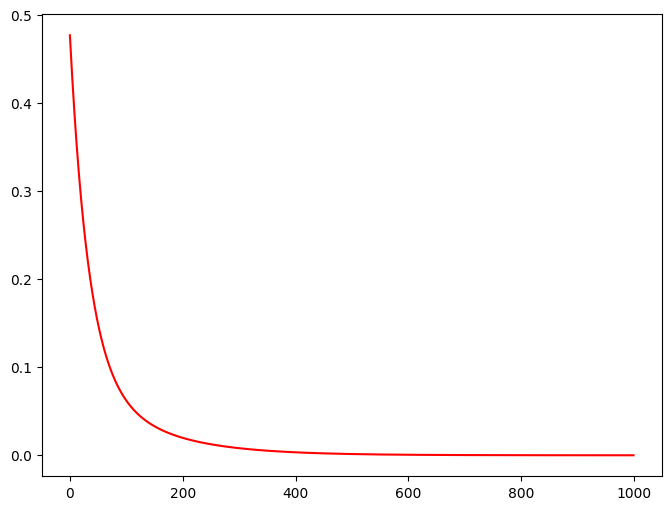

In [29]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(iters),costHistory2,color='r')

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()

In [32]:
model.fit(np.asarray(X),np.asarray(Y))

LinearRegression()

In [33]:
print("斜率 (m):", model.coef_[0])
print("截距 (b):", model.intercept_)

斜率 (m): [0.         1.19303364]
截距 (b): [-3.89578088]


In [48]:
f = model.predict(np.asarray(X)).flatten()
f.shape

(97,)

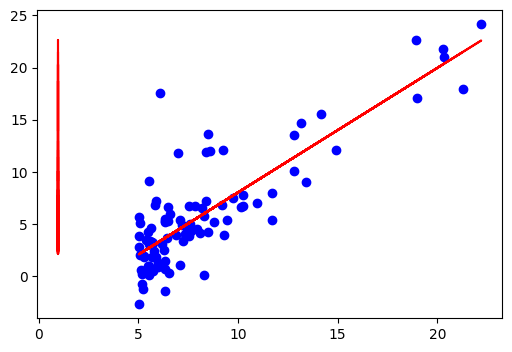

In [46]:
plt.figure(figsize=(6,4))
plt.scatter(Xdata.population,Ydata.profit,color='b',label='trainData')
plt.plot(X,f,color='r',label='predict')